In [2]:
import sys


sys.path.append("..")

In [5]:
from mango.mango import Mango
from mango.agents.agents import Agent


from mango.environments import frozen_lake

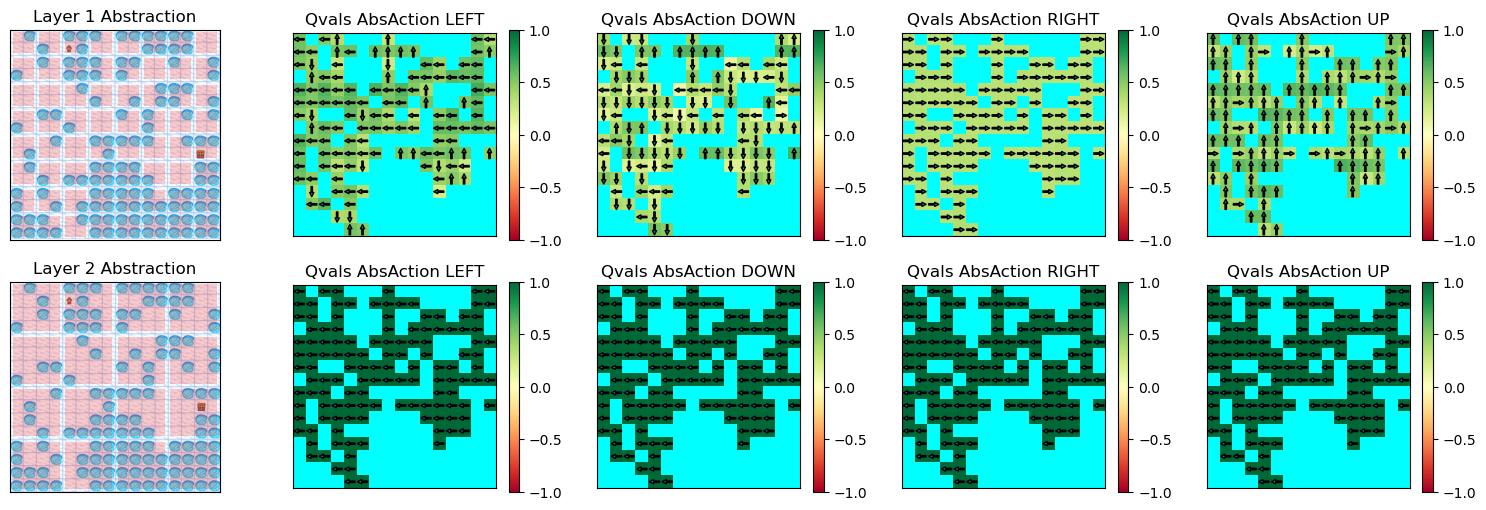

In [6]:
mango = Mango.load_from("trained_models/frozen_lake_mango.pickle")
agent = Agent(mango)


frozen_lake.plot_all_qvals(mango)

In [ ]:
N = 5000
for randomness in (pbar := tqdm(np.linspace(0.99, 0.0, N))):
    pbar.set_description(f"randomness: {randomness:.3f}")
    obs, reward, term, trunc, info = agent.explore(episode_length=100, randomness=randomness)
    agent.train()
agent.save("trained_models/frozen_lake_agent.pickle")